## Analizando resultados de la 3° Encuesta Mundial de Salud Escolar (EMSE) en Argentina

En los siguientes ejemplos nos encontraremos analizando los datos recolectados de la 3° Encuesta Mundial de Salud Escolar (EMSE), en particular, los datos extraídos pertenecientes a la República Argentina. El dataset utilizado se encuentra en el siguiente link:
<http://datos.salud.gob.ar/dataset/base-de-datos-de-la-3-encuesta-mundial-de-salud-escolar-emse-con-resultados-nacionales-argentina>

En la encuesta fueron realizadas muchas preguntas sobre los distintos tópicos que intersectan la vida de los adolescentes en la República Argentina, como: la nutrición, las adicciones, las características del ámbito familiar, entre otros. Con los datos obtenidos, podremos realizar un análisis sobre las condiciones de vida y los comportamientos de los jovenes en edad escolar. Más adelante, veremos cuáles son las preguntas que se les realizaron, y daremos ejemplos sobre qué podríamos llegar a querer averiguar en base a estas.

Para comenzar, importamos las librerías necesarias para visualizar y graficar los datos. Estaremos utilizando:
* [Pandas](https://aprendeconalf.es/docencia/python/manual/pandas/): una herramienta extremadamente versátil y eficiente para procesar estructuras de datos. 
* [Matplotlib](https://aprendeconalf.es/docencia/python/manual/matplotlib/): una de las librerías más simples de aprender, para visualizar gráficos con Python.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

Como paso siguiente, debemos leer y cargar en variables a los siguientes archivos:

1) Dataset de los resultados de la encuesta.  
2) Tabla con las preguntas realizadas.

En los siguientes ejemplos nos encontraremos analizando los datos recolectados de la 3° Encuesta Mundial de Salud Escolar (EMSE), en particular, los datos extraídos pertenecientes a la República Argentina. El dataset utilizado se encuentra en el siguiente link:
<http://datos.salud.gob.ar/dataset/base-de-datos-de-la-3-encuesta-mundial-de-salud-escolar-emse-con-resultados-nacionales-argentina>

Para comenzar, importamos las librerías necesarias para visualizar y graficar los datos. Estaremos utilizando:
* [Pandas](https://aprendeconalf.es/docencia/python/manual/pandas/): una herramienta extremadamente versátil y eficiente para procesar estructuras de datos. 
* [Matplotlib](https://aprendeconalf.es/docencia/python/manual/matplotlib/): una de las librerías más simples de aprender, para visualizar gráficos con Python.

In [4]:
resultados_df = pd.read_csv("EMSE_DatosAbiertos.csv")
codigos_preguntas = pd.read_excel("libro-de-codigos-emse-2018.xlsx") 

Visualizamos una parte del contenido de ambas tablas con la función **head(X)**, que nos permite ver las primeras X filas que especifiquemos.

In [5]:
resultados_df.head(10)

sitio  record   q1 texto_q1   q2   texto_q2   q3  \
0    AG       1  3.0  13 años  2.0   Femenino  2.0   
1    AG       2  3.0  13 años  2.0   Femenino  2.0   
2    AG       3  4.0  14 años  1.0  Masculino  4.0   
3    AG       4  6.0  16 años  1.0  Masculino  2.0   
4    AG       5  3.0  13 años  2.0   Femenino  2.0   
5    AG       6  3.0  13 años  1.0  Masculino  2.0   
6    AG       7  4.0  14 años  2.0   Femenino  4.0   
7    AG       8  2.0  12 años  2.0   Femenino  4.0   
8    AG       9  3.0  13 años  1.0  Masculino  4.0   
9    AG      10  4.0  14 años  2.0   Femenino  2.0   

                                            texto_q3    q4    q5  ...  \
0  9no grado nivel Primario/Polimodal o 2do año n...   NaN   NaN  ...   
1  9no grado nivel Primario/Polimodal o 2do año n...   NaN   NaN  ...   
2  2do año/11vo grado nivel Polimodal o 4to año n...  1.67  56.0  ...   
3  9no grado nivel Primario/Polimodal o 2do año n...  1.73  70.0  ...   
4  9no grado nivel Primario/Polimodal o 2do año n...   NaN   NaN  ...   
5  9no grado nivel Primario/Polimodal o 2do año n...  1.72  48.0  ...   
6  2do año/11vo grado nivel Polimodal o 4to año n...   NaN   NaN  ...   
7  2do año/11vo grado nivel Polimodal o 4to año n...   NaN   NaN  ...   
8  2do año/11vo grado nivel Polimodal o 4to año n...   NaN   NaN  ...   
9  9no grado nivel Primario/Polimodal o 2do año n...   NaN   NaN  ...   

   texto_qnpa5g qnpa7g  texto_qnpa7g qnpe3g  texto_qnpe3g qnpe5g  \
0            Si    1.0            Si    2.0            No    2.0   
1            Si    2.0            No    2.0            No    2.0   
2            Si    2.0            No    2.0            No    2.0   
3            No    2.0            No    1.0            Si    1.0   
4            No    2.0            No    2.0            No    2.0   
5            No    2.0            No    2.0            No    2.0   
6            Si    2.0            No    1.0            Si    1.0   
7            No    2.0            No    1.0            Si    2.0   
8            No    2.0            No    1.0            Si    1.0   
9            No    2.0            No    2.0            No    2.0   

   texto_qnpe5g  weight    stratum psu  
0            No  457.09  201801010  19  
1            No  457.09  201801010  19  
2            No  261.44  201801010  19  
3            Si  550.90  201801010  19  
4            No  457.09  201801010  19  
5            No  550.90  201801010  19  
6            Si  274.43  201801010  19  
7            No  274.43  201801010  19  
8            Si  261.44  201801010  19  
9            No  457.09  201801010  19  

[10 rows x 309 columns]

La primer tabla contiene los resultados de las preguntas de la encuesta realizada. En particular, cada fila corresponde a los resultados de una persona encuestada, y, se tienen las siguientes columnas:
- Sitio: hace referencia al país de origen de la persona encuestada.
- Record: índice único de la fila.

A partir de la tercer columna, estas deberían considerarse de a pares (Columna 3 y 4, columna 5 y 6, etc.):
- La primera representa el código de respuesta de la pregunta de código asociado al nombre de la columna (q1, q2, q3, y así),
- Mientras que la segunda, el texto correspondiente a ese código de respuesta a la pregunta.

In [6]:
codigos_preguntas.head(10)

Código variable standard Código variable ARG (Nº de pregunta)  \
0                     site                                  NaN   
1                      NaN                                  NaN   
2                   record                                  NaN   
3                      NaN                                  NaN   
4                       q1                                   q1   
5                      NaN                                  NaN   
6                      NaN                                  NaN   
7                      NaN                                  NaN   
8                      NaN                                  NaN   
9                      NaN                                  NaN   

            Pregunta  Códigos de respuesta Etiquetas de respuesta  
0              Lugar                   NaN                    NaN  
1                NaN                   NaN                    NaN  
2    Nº  de registro                   NaN                    NaN  
3                NaN                   NaN                    NaN  
4  ¿Qué edad tienes?                   NaN                    NaN  
5                NaN                   1.0        11 años o menos  
6                NaN                   2.0                12 años  
7                NaN                   3.0                13 años  
8                NaN                   4.0                14 años  
9                NaN                   5.0                15 años

La segunda tabla es un poco menos intuitiva que la anterior, ya que no todas las filas corresponden a preguntas. Mientras algunas sí lo hacen (como la fila 4), las que le siguen antes de encontrarnos con la siguiente pregunta, contienen los códigos de respuesta a la misma (fila 4), conjunto a la respuesta legible asociada a ese código.
Las columnas de esta tabla son las siguientes:

* Código variable estándar: código de pregunta estándar. -> Utilizaremos este código para realizar las consultas.
* Código variable ARG (N° de pregunta): código de pregunta en Argentina.
* Pregunta: pregunta asociada al código (en formato de texto).
* Códigos de respuesta: códigos de respuesta posibles para cada pregunta.
* Etiquetas de respuesta: respuesta en formato de texto asociado a cada código.

Como puede verse, los datos que realmente nos interesan son: el código de la pregunta (Codigo variable estándar) y la pregunta en sí (Pregunta). Para una mejor legibilidad, eliminaremos las columnas que no nos sirven, asi como las filas con valores NaN (Not a Number).

Ahora que repasamos los datos que contiene cada tabla, debemos dejarlos listos para poder trabajar de forma cómoda con ellas. Para hacerlo, en primer instancia deberíamos quedarnos solo con aquellas columnas que nos servirán luego durante el análisis. De la segunda tabla (codigos_preguntas), los datos que realmente nos interesan son: el código de la pregunta (Codigo variable estándar) y la pregunta en sí (Pregunta). 

Una forma de realizarlo, es utilizando la función **drop()**, que como primer parámetro, recibe una *lista* con los nombres de las columnas que queremos descartar. Una lista se especifica entre [] (Corchetes), y sus elementos se separan usando , (coma).
Como segundo parámetro, especificaremos de que axis (columnas o filas), queremos eliminar. En nuestro caso, como queremos eliminar columnas, le pasamos el valor "columns".

Para entender mejor el funcionamiento de las listas y de la función drop, pueden dirigirse a:
- https://ellibrodepython.com/listas-en-python
- https://interactivechaos.com/es/python/function/pandasdataframedrop

In [7]:
codigos_preguntas = codigos_preguntas.drop(["Códigos de respuesta",
                                            "Código variable ARG (Nº de pregunta)",
                                            "Etiquetas de respuesta"], 
                                           axis="columns")
codigos_preguntas.head(20)

Código variable standard                    Pregunta
0                      site                       Lugar
1                       NaN                         NaN
2                    record             Nº  de registro
3                       NaN                         NaN
4                        q1           ¿Qué edad tienes?
5                       NaN                         NaN
6                       NaN                         NaN
7                       NaN                         NaN
8                       NaN                         NaN
9                       NaN                         NaN
10                      NaN                         NaN
11                      NaN                         NaN
12                      NaN                         NaN
13                       q2           ¿Cuál es tu sexo?
14                      NaN                         NaN
15                      NaN                         NaN
16                      NaN                         NaN
17                       q3  ¿En qué grado o año estás?
18                      NaN                         NaN
19                      NaN                         NaN

Se puede ver usando el método **.columns**, los nombres actuales de las columnas no son los mejores para trabajar, ya que contienen mayúsculas, espacios y vocales con tildes, así que los renombraremos.

In [8]:
# Nombres de columnas actuales
codigos_preguntas.columns

Index(['Código variable standard', 'Pregunta'], dtype='object')

Renombramos las columnas

In [9]:
codigos_preguntas.columns = ["codigo_variable_estandar",
                             "pregunta"]

In [10]:
# Nombres de columnas resultantes
codigos_preguntas.columns

Index(['codigo_variable_estandar', 'pregunta'], dtype='object')

Quitamos aquellas filas que contienen valores NaN, los cuales no nos sirven, mediante la función **dropna()** y visualizamos la tabla resultante.

In [11]:
codigos_preguntas = codigos_preguntas.dropna()
codigos_preguntas.head(10)

codigo_variable_estandar                                           pregunta
0                      site                                              Lugar
2                    record                                    Nº  de registro
4                        q1                                  ¿Qué edad tienes?
13                       q2                                  ¿Cuál es tu sexo?
17                       q3                         ¿En qué grado o año estás?
24                       q4  ¿Cuál es tu estatura, sin zapatos? (Nota: dato...
26                       q5  ¿Cuánto pesas, sin zapatos?  (Nota: dato en ki...
28                       q6  Durante los últimos 30 días ¿con qué frecuenci...
35                      q10  Durante los últimos 7 días, ¿cuántos días comi...
45                      q15  Durante los últimos 12 meses, Cuantas veces fu...

Todavía nos queda algo por resolver. 
    Por defecto, la cantidad de caracteres que se permite visualizar de cada columna no es muy grande, y no nos permite ver las preguntas completas. Para arreglarlo, cambiaremos el máximo de caracteres visibles de las columnas a un número que nos sea útil cambiando la configuración de pandas de **maxcolwidth**(tamaño máximo de columna) a 200.

In [12]:
pd.options.display.max_colwidth = 200

Veamos cómo quedó la tabla luego de los cambios realizados.

In [13]:
codigos_preguntas.head(10)

codigo_variable_estandar  \
0                      site   
2                    record   
4                        q1   
13                       q2   
17                       q3   
24                       q4   
26                       q5   
28                       q6   
35                      q10   
45                      q15   

                                                                                                                                                        pregunta  
0                                                                                                                                                          Lugar  
2                                                                                                                                                Nº  de registro  
4                                                                                                                                              ¿Qué edad tienes?  
13                                                                                                                                             ¿Cuál es tu sexo?  
17                                                                                                                                    ¿En qué grado o año estás?  
24                                                                                                     ¿Cuál es tu estatura, sin zapatos? (Nota: dato en metros)  
26                                                                                                      ¿Cuánto pesas, sin zapatos?  (Nota: dato en kilogramos.)  
28                                         Durante los últimos 30 días ¿con qué frecuencia te quedaste con hambre porque no había suficiente comida en tu hogar?  
35  Durante los últimos 7 días, ¿cuántos días comiste en un restaurante de comida rápida como  McDonald’s, Burger King, Mostaza, una hamburguesería o panchería?  
45                                                                                       Durante los últimos 12 meses, Cuantas veces fuiste atacado físicamente?

Como se puede ver, los datos que nos provee esta tabla son los códigos de las preguntas asociados a las preguntas correspondientes dentro del cuestionario. En la tabla de respuestas, lo que encontramos es que el código de cada pregunta corresponde con el nombre de una columna, y la respuesta se encuentra en una columna siguiente con nombre **text_código**. (q1 y text_q1, y así). 

En base a los datos que se nos proveen podemos querer realizar muchos cálculos, entre los cuales se pueden encontrar, por ejemplo:

* Comparación entre las veces que comieron snacks vs las veces que comieron frutas durante los ultimos 7 dias.
* Porcentajes de niños junto a la frecuencia con la que no recibieron una alimentación adecuada durante los últimos 30 días.
* Relación entre los niños fumadores y el uso de tabaco en su entorno familiar.
* Cuáles son las edades más frecuentes en las que se consume alcohol por primera vez.
* etc.

De todas las preguntas que hicimos, nos concentraremos analizar y graficar los datos correspondientes a las primeras dos, pero los datos que nos ofrece esta encuesta los interrogantes que pueden surgir son muchísimos. 

## 1° gráfico: Cantidad de veces que comieron snacks vs. cantidad de veces que comieron frutas.

Como primer interrogante a resolver, elegimos identificar la cantidad de veces que comieron snacks vs veces que comieron frutas.

Realizaremos ambos gráficos, uno al lado del otro. Para ello, las preguntas que necesitamos son aquellas con codigo q64 (Snacks), y con codigo q61 (Frutas). Para que sea más sencillo acceder a cada una de las preguntas, haremos que la columna *codigo_variable_estandar* que contiene elementos no repetidos para cada fila pase a ser el índice de la tabla con **set_index(nombre_columna)**. 

In [14]:
codigos_preguntas = codigos_preguntas.set_index("codigo_variable_estandar")
codigos_preguntas.head()

pregunta
codigo_variable_estandar                            
site                                           Lugar
record                               Nº  de registro
q1                                 ¿Qué edad tienes?
q2                                 ¿Cuál es tu sexo?
q3                        ¿En qué grado o año estás?

Luego, utilizaremos **at[índice, columna]** para quedarnos con el valor que contiene la columna *pregunta* para el índice "q64".

In [15]:
pregunta_snacks = codigos_preguntas.at["q64", "pregunta"]
pregunta_snacks

'Durante los últimos 7 días ¿cuántas veces comiste comida salada o snaks, como papas fritas, palitos, chizitos, kesitas, saladix?'

Lo mismo hacemos con la pregunta de código "q61":

In [16]:
pregunta_frutas = codigos_preguntas.at["q61", "pregunta"]
pregunta_frutas

'Durante los últimos 7 días ¿cuántas veces comiste frutas como manzanas, naranjas, bananas, mandarinas?'

### Gráfico "snacks vs. frutas" utilizando Matplotlib.

Para procesar los datos antes de graficarlos, agrupamos la tabla de resultados de la encuesta según la respuesta a la pregunta q64 (columna "texto_q64") usando **groupby(columna)** y contamos la cantidad de apariciones en cada grupo, seleccionando una columna que sirva como índice (en nuestro caso "record") y aplicandole la función **count**.

In [17]:
resultados_snacks_df = resultados_df.groupby("texto_q64")["record"].count()
resultados_snacks_df.head(10)

texto_q64
1 a 3 veces durante los últimos 7 días                  24684
1 vez al día                                             5319
2 veces al día                                           2058
3 veces al día                                            907
4 a 6 veces durante los últimos 7 días                   5130
4 o más veces al día                                     1427
Dato perdido                                              353
No comí comida salada o snacks en los últimos 7 días    17103
Name: record, dtype: int64

Realizamos un gráfico de torta, agregandole a la función **plot()**, el valor "pie" al parámetro *kind*.

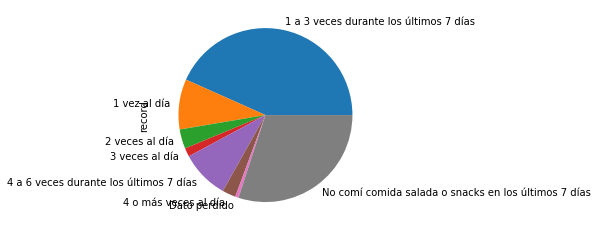

In [18]:
resultados_snacks_df.plot(kind='pie')
plt.show()

¿Cómo podríamos mejorar el gráfico?

* Podríamos querer quitar la etiqueta "record" del costado, lo cual hacemos dandole el valor "" al parámetro *ylabel*. 
* Si quisiéramos agregarle un título, lo hacemos con el parámetro **title** que recibe el título del gráfico. 
* Y si nos resulta muy chico el título como se ve el gráfico, podemos cambiarle el tamaño con el parámetro **figsize**, que recibe una tupla de dos elementos: 
    * el primero corresponde con el ancho en pulgadas, 
    * y el segundo con el alto (también en pulgadas). 


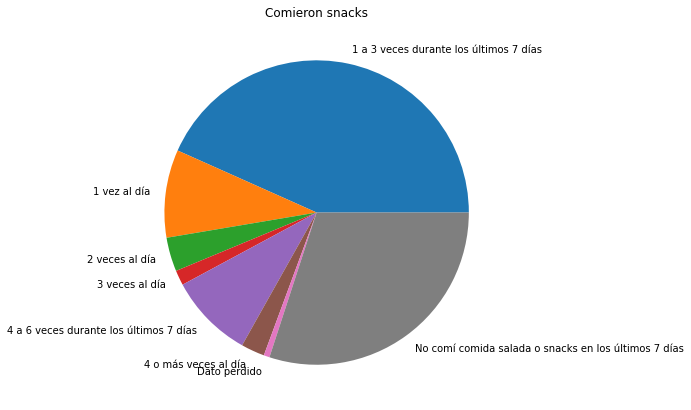

In [19]:
resultados_snacks_df.plot(kind='pie', ylabel="", figsize=(10,7), title="Comieron snacks")
plt.show()

Y si queremos ver los procentajes que representan cada uno...

Le agregamos el parámetro *autopct* con el valor '%1.2f%%', lo cual indica que queremos que se vea en formato de porcentaje, con dos decimales.

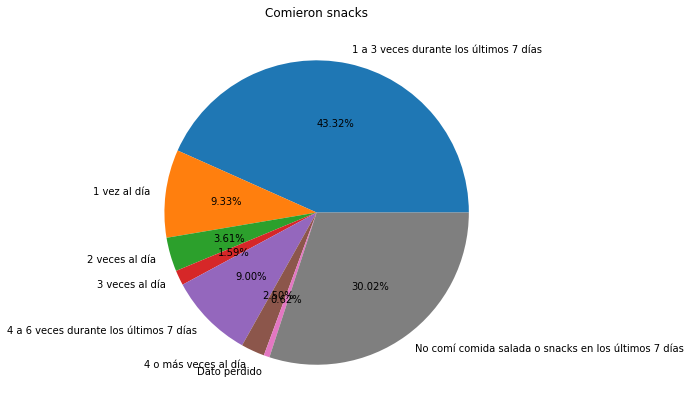

In [20]:
resultados_snacks_df.plot(kind='pie', ylabel="", figsize=(10,7), title="Comieron snacks", autopct='%1.2f%%')
plt.show()

Lo único que quedaría, es pasar las etiquetas de alrededor del gráfico a un cuadro aparte, de forma que se vea mucho más prolijo.

Esto lo logramos agregando:
1. agregando el parámetro **label** con valor *None*

2. usando la función **plt.legend()**, a este método le enviamos los siguientes parámetros:
     * *bbox_to_anchor* con los valores apropiados para que se visualice por debajo del gráfico. 
    * una lista de las etiquetas: *labels_snacks*. Esta lista, para no tener que escribirla a mano, la podemos extraer de nuestro índice de la tabla como se puede ver a continuación.
    
Extraemos los valores del índice de los datos que tenemos en **resultados** y lo convertimos a una lista.

In [24]:
labels_snacks = list(resultados_snacks_df.index)

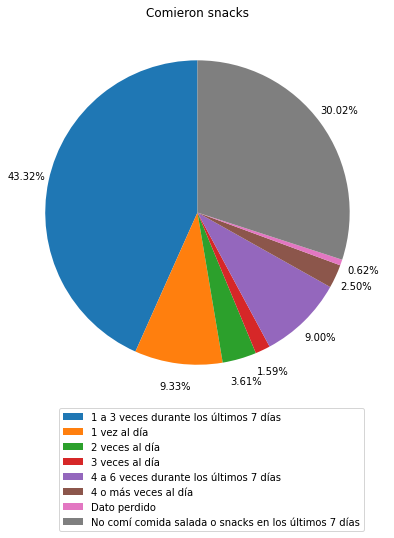

In [36]:
fig_snacks = resultados_snacks_df.plot(kind='pie', ylabel="",
                                       labels=None,  figsize=(7,7), 
                                       title="Comieron snacks",
                          autopct='%1.2f%%',startangle=90, 
                                       pctdistance=1.15)
plt.legend(labels_snacks, bbox_to_anchor=(0.1, 0.5, 0.85, -0.5))
plt.show()

**Observación:**

Agregamos los parámetros **startangle** y **pctdistance** para que se pueda visualizar mejor:
* **startangle**: recibe el grado de comienzo de la primer sección. Como le pusimos el valor 90, la primer sección comenzará desde el ángulo 90.
* **pctdistance**: La distancia entre el centro de cada porción del gráfico de torta y el comienzo del texto que generamos con *autopct*.

Por último, realizamos lo mismo con el gráfico de frutas:

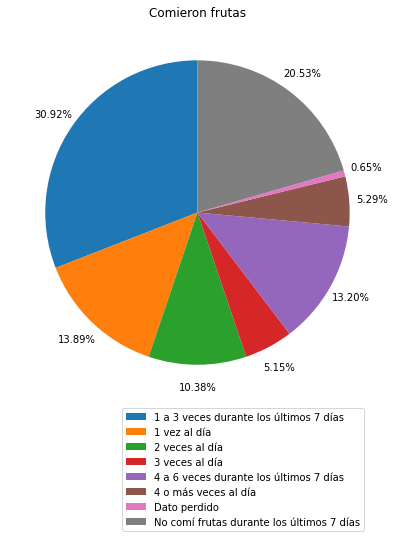

In [26]:
resultados_frutas_df = resultados_df.groupby("texto_q61")["record"].count()

labels_frutas = list(resultados_frutas_df.index)

fig_frutas = resultados_frutas_df.plot(kind='pie', ylabel="",labels=None,  figsize=(10,7), title="Comieron frutas",
                          autopct='%1.2f%%',startangle=90, pctdistance=1.15)
plt.legend(labels_frutas, bbox_to_anchor=(0.1, 0.5, 0.85, -0.5))
plt.show()

## 2° gráfico: frecuencia con la que tuvieron una mala alimentación en los últimos 30 días.

Se necesitan los datos para eso miramos nuevamente la tabla que contienen las preguntas: 

In [37]:
codigos_preguntas.head(10)

pregunta
codigo_variable_estandar                                                                                                                                                              
site                                                                                                                                                                             Lugar
record                                                                                                                                                                 Nº  de registro
q1                                                                                                                                                                   ¿Qué edad tienes?
q2                                                                                                                                                                   ¿Cuál es tu sexo?
q3                                                                                                                                                          ¿En qué grado o año estás?
q4                                                                                                                           ¿Cuál es tu estatura, sin zapatos? (Nota: dato en metros)
q5                                                                                                                            ¿Cuánto pesas, sin zapatos?  (Nota: dato en kilogramos.)
q6                                                               Durante los últimos 30 días ¿con qué frecuencia te quedaste con hambre porque no había suficiente comida en tu hogar?
q10                       Durante los últimos 7 días, ¿cuántos días comiste en un restaurante de comida rápida como  McDonald’s, Burger King, Mostaza, una hamburguesería o panchería?
q15                                                                                                            Durante los últimos 12 meses, Cuantas veces fuiste atacado físicamente?

Vemos que responden al código de pregunta q6 (Frecuencia con la que tuvieron una mala alimentación). 

Al igual que como hicimos con las preguntas anteriores, nos aseguramos de que sea la pregunta correcta en la tabla:

In [21]:
pregunta_mala_alimentacion = codigos_preguntas.at["q6","pregunta"]
pregunta_mala_alimentacion

'Durante los últimos 30 días ¿con qué frecuencia te quedaste con hambre porque no había suficiente comida en tu hogar?'

Para lograr el gráfico, se deben seguir los siguientes pasos:
* se debe agrupar los resultados por frecuencia del suceso (función groupby() ya vista)
* luego contar la cantidad de gente que pertenece a cada grupo utilizando **count()**. 
* En este caso, agrupamos primero por el código de respuesta y luego por el texto de la respuesta, de forma de que queden ordenados (Nunca -> Rara vez -> Algunas veces, y así) para que se visualicen con orden en el gráfico.

In [42]:
frecuencia_mala_alimentacion_df = resultados_df.groupby(["q6",
                                                        "texto_q6"]
                                                         )["record"].count()
frecuencia_mala_alimentacion_df

q6   texto_q6     
1.0  Nunca            38257
2.0  Rara vez         11820
3.0  Algunas veces     5342
4.0  Casi siempre       749
5.0  Siempre            314
Name: record, dtype: int64

Si invirtíeramos (texto_q6, luego q6) toma como parámetro para ordenar el orden alfabético del los textos: **A**lgunas veces, **C**asi siempre, ...

In [41]:
frecuencia_mala_alimentacion_df = resultados_df.groupby(["texto_q6",
                                                        "q6"]
                                                         )["record"].count()
frecuencia_mala_alimentacion_df

texto_q6       q6 
Algunas veces  3.0     5342
Casi siempre   4.0      749
Nunca          1.0    38257
Rara vez       2.0    11820
Siempre        5.0      314
Name: record, dtype: int64

In [66]:
frecuencia_mala_alimentacion_df = resultados_df.sort_values(["q6"]).groupby(["q6",
                                                                             "texto_q6"]
                                                                           )["record"].count()
frecuencia_mala_alimentacion_df

q6   texto_q6     
1.0  Nunca            38257
2.0  Rara vez         11820
3.0  Algunas veces     5342
4.0  Casi siempre       749
5.0  Siempre            314
Name: record, dtype: int64

Como agrupamos por dos criterios (y eso genera un multi-índice), nos desharemos del multi-índice con la función **reset_index**.
 Y usamos los parámetros  **level** y **drop** para eliminar columnas que no nos sirven para el gráfico.
 
  Si le índicamos el valor *True* al parámetro drop, se deshará del nivel de multi-índice pasado que en nuestro caso es el 0 (q64) dejando así, solo la columna texto_q64.

In [69]:
frecuencia_mala_alimentacion_df = frecuencia_mala_alimentacion_df.reset_index(level=0, drop=True)
frecuencia_mala_alimentacion_df

texto_q6
Nunca            38257
Rara vez         11820
Algunas veces     5342
Casi siempre       749
Siempre            314
Name: record, dtype: int64

Por último, se grafica el resultado usando un gráfico de barras.

<AxesSubplot:xlabel='texto_q6'>

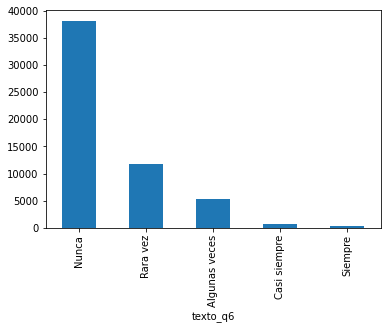

In [70]:
frecuencia_mala_alimentacion_df.plot(kind='bar')

En sí, con eso ya tendríamos nuestro gráfico... pero no se ve muy bien. Podemos cambiarl los colores para que se vea más lindo, el gráfico es chico, no tiene título y se puede ver la etiqueta "texto_q64" abajo. 

Ahora vamos a mejorarlo usando los mismos parámetros que vimos anteriormente en los gráficos de torta.
* **title**: a este parámetro le pasamos el título que queremos que se vea sobre nuestro gráfico.
* **xlabel**: indica la etiqueta del eje x, le pondremos "" para que no muestre nada.
* **color**: le indicaremos "purple" para que en vez de azul, las barras del gráfico se vean violetas.
* **figsize**: recibe una tupla (x,y) en donde *x* es el ancho e *y* es el alto en pulgadas del gráfico.

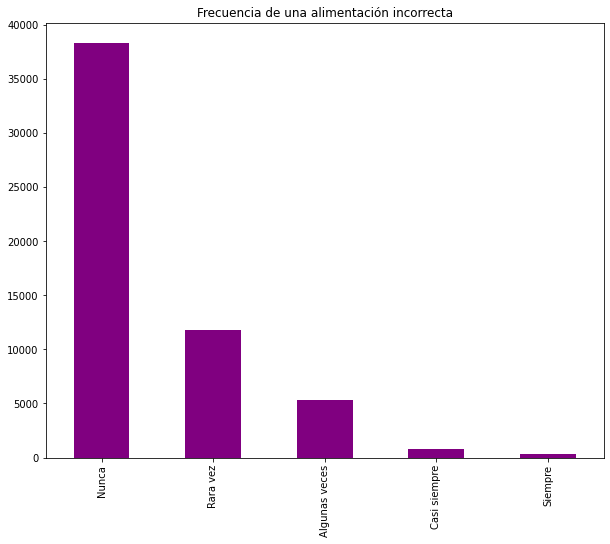

In [71]:
frecuencia_mala_alimentacion_df.plot(kind="bar", 
                                     title='Frecuencia de una alimentación incorrecta',
                                     xlabel="", 
                                     figsize = (10,8), 
                                     color="purple")
plt.show()